# Volume 4: Finite Difference Method
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> “I bought a ward against it off a traveling fortune-teller. It lets me add two ’n’ two and get a pickle.”

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

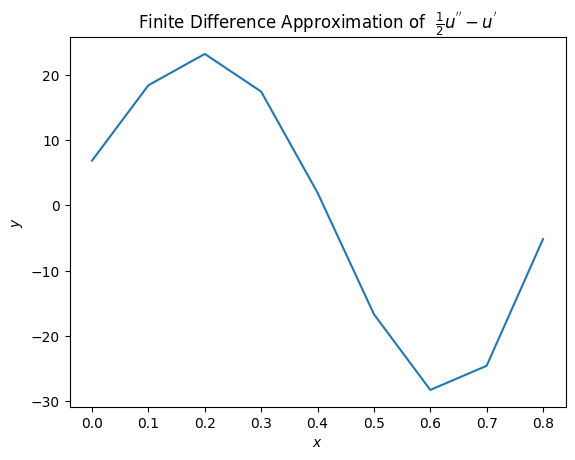

In [39]:
a = 0
b = 1
n = 10
h = (b-a)/n
x = np.linspace(a,b,n+1)
u = lambda x: np.sin((x+np.pi)**2 - 1)
B = u(x)

# set up u prime
diag = np.diag(np.ones(n+1) * -1) + np.diag(np.ones(n-1), 2)
A1 = diag[:-2] * 1/(2*h)
du = A1 @ B

# set up u double prime
diag = np.diag(np.ones(n+1)) + np.diag(np.ones(n-1), 2) + np.diag(np.ones(n) * -2, 1)
A2 = diag[:-2] * 1/h**2
ddu = A2 @ B

# make approximation and plot
approx = 0.5 * ddu - du
plt.plot(x[:-2], approx)
plt.title(r"Finite Difference Approximation of  $\frac{1}{2}u^{''} - u^{'}$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

(29, 29)
(29,)


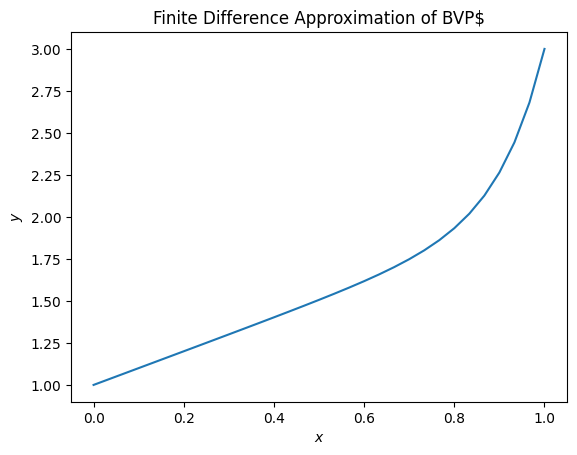

In [65]:
# initialize parameters
e = 0.1
a = 1
b = 3
n = 30
t0 = 0
t1 = 1
h = (t1-t0)/n
x = np.linspace(t0, t1, n+1)
f = lambda x: -1*np.ones_like(x)

# solve for U
A = -2*e*np.eye(n-1) + (e-h/2)*np.eye(n-1, k=1) + (e+h/2) * np.eye(n-1, k=-1)
A *= 1/h**2

C = f(x[1:-1])
C[0] -= a*(e+h/2)/h**2
C[-1] -= b*(e-h/2)/h**2

U = la.solve(A, C)
U = np.concatenate(([a], U, [b]))

# plot
plt.plot(x, U)
plt.title(r"Finite Difference Approximation of BVP$")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. Note that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [91]:
def singular_bvp(eps, alpha, beta, f, n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    # initialize parameters
    t0, t1 = 0, 1
    x = np.linspace(t0, t1, n+1)
    h = (t1 - t0)/n

    # solve for U
    A = -2*eps*np.eye(n-1) + (eps-h/2)*np.eye(n-1, k=1) + (eps+h/2) * np.eye(n-1, k=-1)
    A *= 1/h**2

    C = f(x[1:-1])
    C[0] -= alpha*(eps+h/2)/h**2
    C[-1] -= beta*(eps-h/2)/h**2

    U = la.solve(A, C)
    U = np.concatenate(([alpha], U, [beta]))
    return U

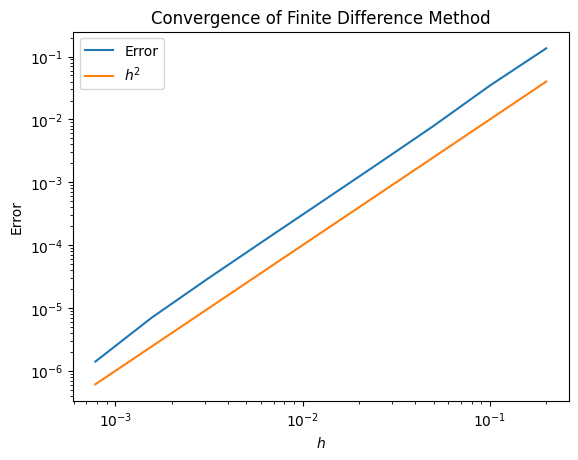

In [92]:
# initialize parameters
eps = 0.1
x = np.linspace(t0, t1, n+1)
f = lambda x: -1*np.ones_like(x)
alpha = 1
beta = 3
n = 30

# initialize error variables
n_list = [5*2**i for i in range(9)]
error_list = []
sol_best = singular_bvp(eps, alpha, beta, f, 5*(2**9))
sub_interval = 5*np.array([2**j for j in range(10)])[:-1]

# compute errors
for j, interval in enumerate(sub_interval):
    sol_approx = singular_bvp(0.1, alpha, beta, f, interval)
    error_list.append(np.max(np.abs(sol_approx - sol_best[::2**(9-j)])))

# plot
h = 1 / sub_interval
plt.loglog(h, error_list, label='Error')
plt.loglog(h, h**2, label=r'$h^2$')
plt.legend()
plt.title('Convergence of Finite Difference Method')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.show()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

In [79]:
def bvp(a, b, alpha, beta, a1, a2, a3, f, n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    # initialize parameters
    x, h = np.linspace(a, b, n+1, retstep=True)
    y = f(x[1:-1])

    # evaluate coefficient functions
    _a1 = a1(x[1:-1])
    _a2 = a2(x[1:-1])
    _a3 = a3(x[1:-1])

    # compute diagonals
    A = _a1[1:] - _a2[1:]*(h/2)
    B = -2*_a1 + _a3*(h**2)
    C = _a1[:-1] + _a2[:-1]*(h/2)

    # construct sparse matrix
    d1 = np.diag(A, -1)
    d2 = np.diag(B)
    d3 = np.diag(C, 1)
    diagonal = (d1 + d2 + d3)/h**2
    
    # correct first and last values of y
    y[0] -= alpha*((a1(a) - a2(a)*(h/2))/(h**2))
    y[-1] -= beta*(_a1[-1]/(h**2) + _a2[-1]/(2*h))

    # solve for U and return
    U = la.solve(diagonal, y)
    U = np.concatenate(([alpha], U, [beta]))
    return U

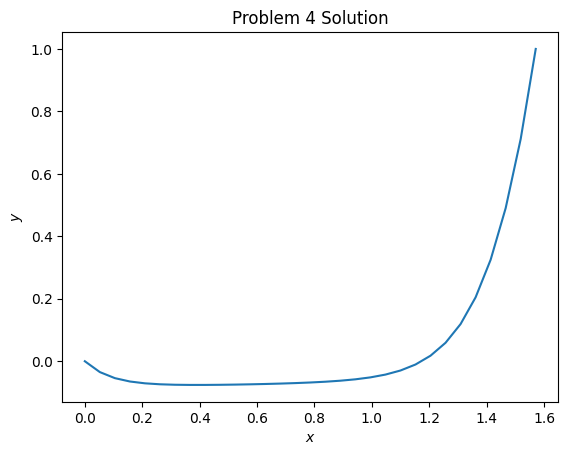

In [85]:
alpha = 0
beta = 1
eps = 0.1
n = 30
a = 0
b = np.pi / 2
x = np.linspace(a, b, n+1)

f = lambda x: np.cos(x)
a1 = lambda x: eps * np.ones_like(x)
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4 * (np.pi - x**2)

# solve for U
U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)

# plot
plt.plot(x, U)
plt.title("Problem 4 Solution")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

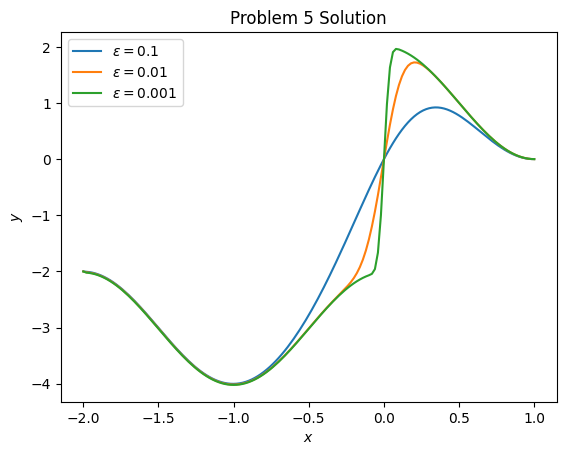

In [86]:
# initialize parameters
eps_list = [0.1, 0.01, 0.001]
a = -2
b = 1
n = 150
alpha = -2
beta = 0
x = np.linspace(a, b, n+1)

for eps in eps_list:
    f = lambda x: -eps * np.pi**2 * np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)
    a1 = lambda x: eps * np.ones_like(x)
    a2 = lambda x: x
    a3 = lambda x: np.zeros_like(x)

    # solve for U and plot
    U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(x, U, label=r'$\epsilon = {}$'.format(eps))

# set plot parameters
plt.title("Problem 5 Solution")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

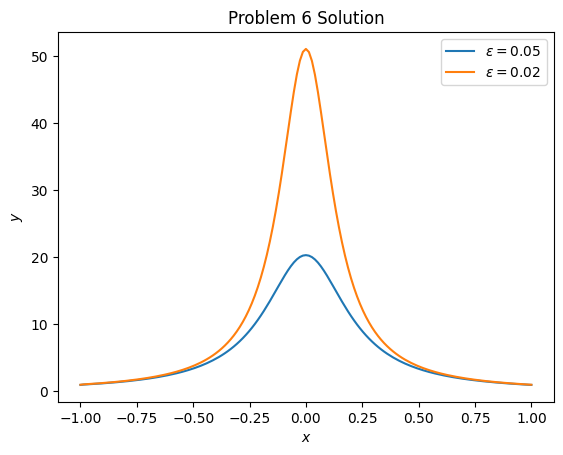

In [88]:
# initialize parameters
eps_list = [0.05, 0.02]
n = 150
a = -1
b = 1
x = np.linspace(a, b, n+1)

for eps in eps_list:
    alpha = 1 / (1+eps)
    beta = 1 / (1+eps)

    f = lambda x: np.zeros_like(x)
    a1 = lambda x: eps + x**2
    a2 = lambda x: 4*x
    a3 = lambda x: 2*np.ones_like(x)

    # solve for U and plot
    U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(x, U, label=r'$\epsilon = {}$'.format(eps))

# set plot parameters
plt.title("Problem 6 Solution")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()